In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Main reference

1. https://matplotlib.org/stable/users/explain/quick_start.html#coding-styles

# Artist, Axes and Axis

- **Axes**: A canvas on which we draw (A figure is a space *for* canvas(es))
- **Axis**: The mathematical 'axis'
- **Artist**: Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

See object definitions:
1. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes
2. https://matplotlib.org/stable/api/axis_api.html#matplotlib.axis.Axis
3. https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist

## Types of inputs to plotting functions

Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input, or objects that can be passed to `numpy.asarray`. Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting. For example, to convert a numpy.matrix

In [2]:
import numpy as np

b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
print(b_asarray)

[[1 2]
 [3 4]]


Most methods will also parse a string-indexable object like a dict, a structured numpy array, or a pandas.DataFrame. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

Text(0, 0.5, 'entry b')

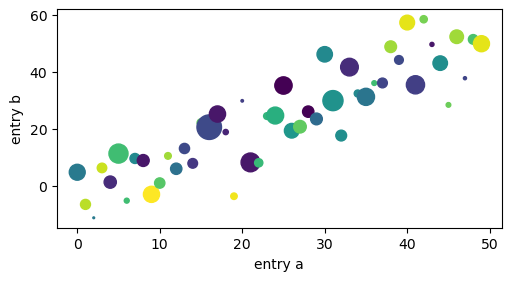

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50) # basically, the multiplier 10 controls how randomly the y values are distributed, per x value. If it's 1, it looks totally linear (try it)
data['d'] = np.abs(data['d']) * 100 # controls the size of the points (see later in ax.scatter)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

# Coding Styles

- Explicit: Using OO style
- Implicit: Use plt
- Additional style:  Embedding matplotlib in GUIs (PyQt/PySide, PyGObject, Tkinter, and wxPython)

OO example:

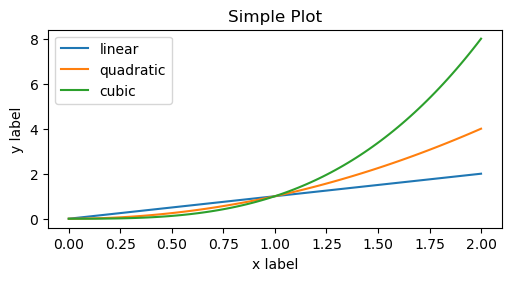

In [4]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the Axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the Axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the Axes.
ax.set_ylabel('y label')  # Add a y-label to the Axes.
ax.set_title("Simple Plot")  # Add a title to the Axes.
ax.legend()  # Add a legend.

Implicity: Using plt

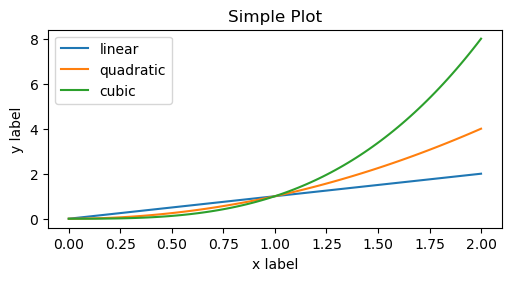

In [5]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) Axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

## Making a helper function

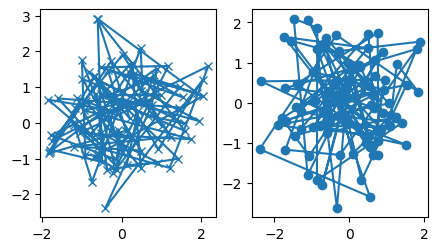

In [9]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

# Styling artists

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

[<matplotlib.lines.Line2D object at 0x000002B8F7103350>, <matplotlib.lines.Line2D object at 0x000002B8F70C80D0>]


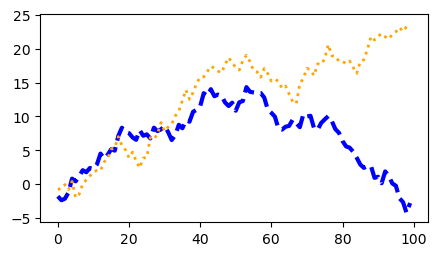

In [23]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
l = ax.plot(x, np.cumsum(data1), c='blue', linewidth=3, linestyle='--') # ax.plot() returns a list of 1 line2d object
l.extend(ax.plot(x, np.cumsum(data2), color='orange', linewidth=2))
print(l) # l is a list of line2d elements
l[1].set_linestyle(':')

In [24]:
l

## Colors

Matplotlib has a very flexible array of colors that are accepted for most Artists; see [allowable color definitions](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def) for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

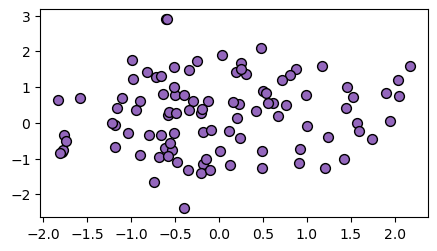

In [42]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C4', edgecolor='k')

## Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the [linestyles example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html).

Marker size depends on the method being used. [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) specifies markersize in points, and is generally the "diameter" or width of the marker. [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter) specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see [markers](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)), or users can define their own [MarkerStyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle) (see Marker reference):

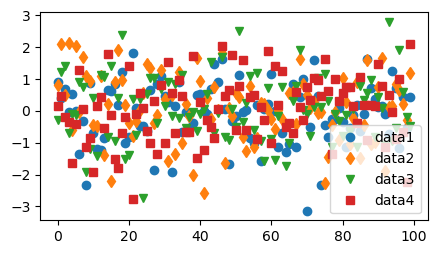

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

# Labelling plots

## Axes labels and text

[set_xlabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel), [set_ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel), and [set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title) are used to add text in the indicated locations (see [Text in Matplotlib](https://matplotlib.org/stable/users/explain/text/text_intro.html#text-intro) for more discussion). [Text](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) can also be directly added to plots using text:

Text(0.5, 0, 'Length [cm]')
['_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alias_map', '_alpha', '_animated', '_antialiased', '_axes', '_bbox_patch', '_callbacks', '_char_index_at', '_charsize_cache', '_clipon', '_clippath', '_cm_set', '_color', '_different_canvas', '_fontproperties', '_fully_clipped_to_axes', '_get_dist_to_box', '_get_layout', '_get_multialignment', '_get_rendered_text_width', '_get_wrap_line_width', '_get_wrapped_text', '_get_xy_display', '_gid', '_horizontalalignment', '_in_layout', '_internal_update', '_label', '_linespacing', '_mouseover', '_multialignment', '_parse_math', '_path_effects', '_picker', '_prep

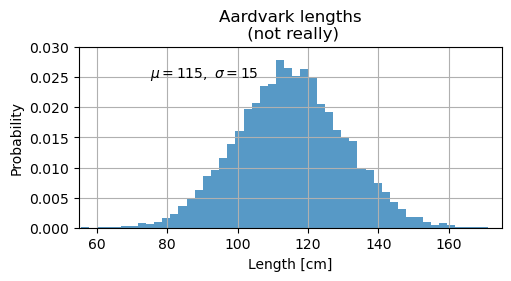

In [57]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

# change xlabel, check what it is and all its attributes and then play around with it.
t = ax.set_xlabel('Length [cm]') 
print(t)
print(dir(t))

ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$') # 'r' means 'raw'
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

All of the [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) functions return a [matplotlib.text.Text](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text) instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

In [49]:
t = ax.set_xlabel('my data', fontsize=14, color='red')
t

Text(0.5, 24.0, 'my data')

These properties are covered in more detail in [Text properties and layout](https://matplotlib.org/stable/users/explain/text/text_props.html#text-props).

## Using mathematical expressions in text

for details see [Writing mathematical expressions](https://matplotlib.org/stable/users/explain/text/mathtext.html#mathtext). You can also use LaTeX directly to format your text and incorporate the output directly into your display figures or saved postscript – see [Text rendering with LaTeX](https://matplotlib.org/stable/users/explain/text/usetex.html#usetex).

## Annotations

We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

(-2.0, 2.0)

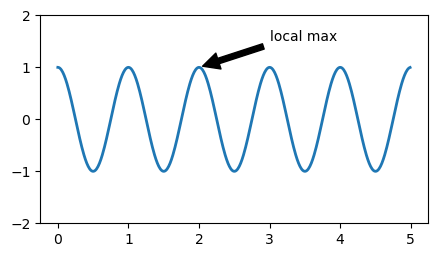

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2) # lw is the same as `linewidth`

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose -- see [Basic annotation](https://matplotlib.org/stable/users/explain/text/annotations.html#annotations-tutorial) and [Advanced annotation](https://matplotlib.org/stable/users/explain/text/annotations.html#plotting-guide-annotation) for details. More examples also can be found in [Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html).

# Axis scales and ticks

## Scales

In matplotlib, axis objects can be of the following scales

1. Linear (by default)
2. Log: using `loglog`
3. Semilog: using `semilogx`, `semilogy`

See [scales](https://matplotlib.org/stable/gallery/scales/scales.html) for examples

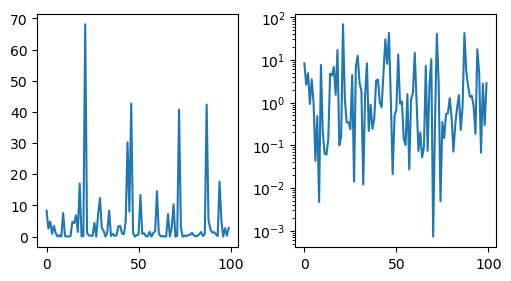

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See [Transformations Tutorial](https://matplotlib.org/stable/users/explain/artists/transforms_tutorial.html#transforms-tutorial).

## Tick locators and foramtters

- `set_xticks`

Text(0.5, 1.0, 'Manual ticks')

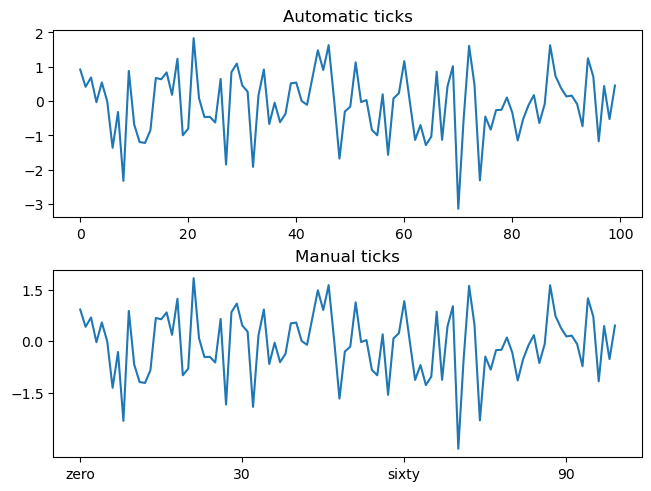

In [ ]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

Different scales can have different locators and formatters; for instance the log-scale above uses [LogLocator](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogLocator) and [LogFormatter](https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.LogFormatter). See [Tick locators](https://matplotlib.org/stable/gallery/ticks/tick-locators.html) and [Tick formatters](https://matplotlib.org/stable/gallery/ticks/tick-formatters.html) for other formatters and locators and information for writing your own

## Plotting dates and strings



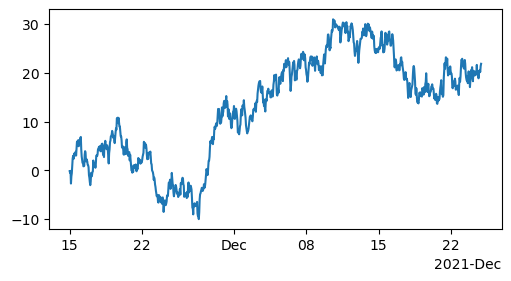

In [ ]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

For more information see the date examples (e.g. [Date tick labels](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

For strings, we get categorical plotting (see: [Plotting categorical variables](https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html)).

<BarContainer object of 4 artists>

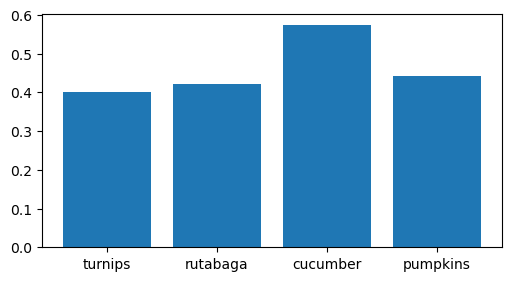

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

## Additional axis objects

### Shared axes 

- use `twinx()`(`twiny`) to share the x-axis(y-axis) => second y-axis(x-axis) will be visible opposite to the first. (see [Plots with different scales](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html))

- Use `secondary_xaxis()`(`secondary_yaxis()`) for __. See [secondary axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) for examples.

Text(0.5, 0, 'Angle [°]')

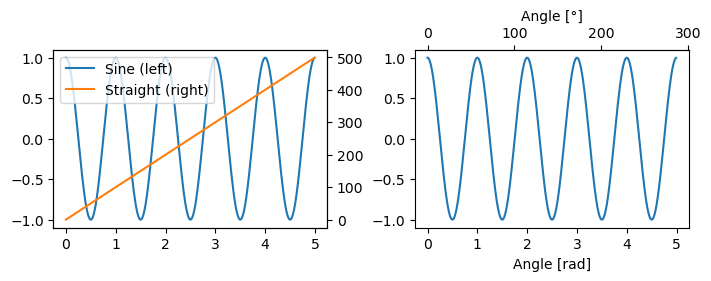

In [ ]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

# Color mapped data

Text(0.5, 1.0, 'scatter()')

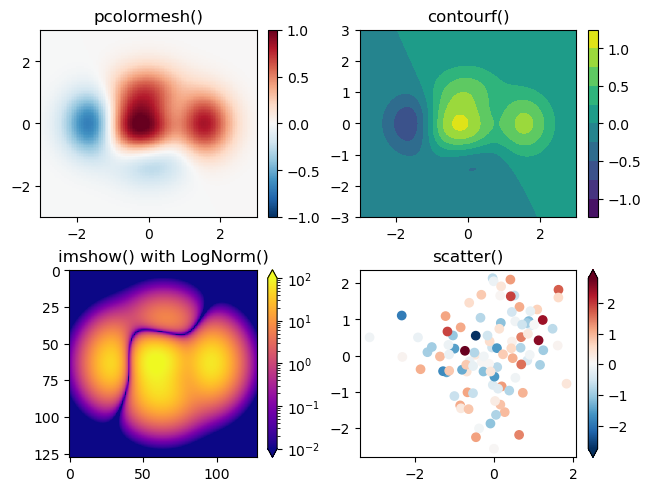

In [9]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

## Colormaps

These are all examples of Artists that derive from [ScalarMappable](https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable) objects. They all can set a linear mapping between vmin and vmax into the colormap specified by cmap. Matplotlib has many colormaps to choose from ([Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps)) you can make your own ([Creating Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#colormap-manipulation)) or download as third-party packages.

## Normalizations

Sometimes we want a non-linear mapping of the data to the colormap, as in the `LogNorm` example above. We do this by supplying the ScalarMappable with the norm argument instead of vmin and vmax. More normalizations are shown at [Colormap normalization](https://matplotlib.org/stable/users/explain/colors/colormapnorms.html#colormapnorms).